<a href="https://colab.research.google.com/github/aparnashenoy/ml/blob/master/Feb_data_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
path = '/gdrive/My Drive/'

In [3]:
import numpy as np
import pandas as pd
from pandas import*
import datetime
import glob

# Data Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data pre-processing libraries
from sklearn.preprocessing import LabelEncoder


In [4]:
import os, zipfile

dir_name = path + 'feb/'

extension = ".zip"



os.chdir(path + 'feb/') # change directory from working dir to dir with files

for item in os.listdir(dir_name): 
  if item.endswith(extension): 
    file_name = os.path.abspath(item) # get full path of files
    zip_ref = zipfile.ZipFile(file_name) # create zipfile object
    zip_ref.extractall(path + 'feb_eda/') # extract file to dir

zip_ref.close()

In [5]:
filenames = sorted(glob.glob(path + '/feb_eda/*csv'))

In [6]:
my_list = []
new_path = path + '/feb_eda/*.csv'
for file in glob.glob(new_path):
  print(file)
  a = pd.read_csv(file)
  my_list.append(a)

/gdrive/My Drive//feb_eda/Feb.csv


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1,15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [7]:
data = pd.read_csv(path +'/feb_eda/Feb.csv')

In [8]:
data.head()

,uuid,mmsi_no,imo_no,speed,course,latitude,longitude,sensor_timestamp,track_type_code,country_name,...,destinationpoint,draught,eta,in_track,length,source_sub_type_name,source_type_name,track_mil_civ_code,track_type_name,trackname
0,ce5684bb-b590-4c46-b134-7e84b71462e2,419001029,NaN,10.5,55.099998,17.7967,83.4948,1612152736,LAW-ENFORCEMENT,India,...,S,NaN,1.609443e+09,False,NaN,NAIS,MSIS,CIV,LAW-ENFORCEMENT,CG 15
1,7586c417-8fe7-41c0-b38d-4380e05c69b1,81060218,NaN,0.9,299.000000,-5.6118,-163.1225,1612089897,UNKNOWN,UNKNOWN,...,NaN,NaN,1.609439e+09,False,NaN,EXACTEARTH,MSIS,CIV,UNKNOWN,LS5886-2
2,a354b2cc-a05a-42f4-9c76-f3c99ef8ae2c,345080003,9338163.0,0.0,359.000000,27.9167,-110.8733,1612115245,TOWING,Mexico,...,MAZATLAN,0.0,1.609439e+09,False,80.0,EXACTEARTH,MSIS,CIV,TOWING,VB GLORIOSO
3,aa31c62d-6a21-404f-9e10-f71d7a4c8022,235014661,NaN,0.0,236.000000,50.7967,-1.1167,1612139293,UNKNOWN,United Kingdom,...,NaN,NaN,1.609443e+09,False,NaN,EXACTEARTH,MSIS,CIV,UNKNOWN,PILOT BOAT HAMPSHIRE
4,e3aff4c3-2998-4618-ba64-e40010a25e5d,265514800,NaN,0.0,255.500000,55.6136,12.9974,1612151841,PILOT-VESSEL,Sweden,...,NaN,NaN,1.609439e+09,False,NaN,MSSIS,MSIS,CIV,PILOT-VESSEL,Pilot 114 SE


In [9]:


missing_count=data.isnull().sum()



In [10]:
missing_percent=(data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)

In [11]:


missing_data = pd.concat([missing_count, missing_percent], axis=1, keys=['missing_count', 'missing_percent'])



In [12]:
missing_data

,missing_count,missing_percent
uuid,4051,0.040444
mmsi_no,2564,0.025598
imo_no,2529223,25.250720
speed,0,0.000000
course,0,0.000000
latitude,0,0.000000
longitude,0,0.000000
sensor_timestamp,0,0.000000
track_type_code,2564,0.025598
country_name,4052,0.040453


In [13]:
data['MMSI_length']=data['mmsi_no'].map(str).apply(len)

In [14]:
invalid_MMSI_length = data['MMSI_length'].value_counts()

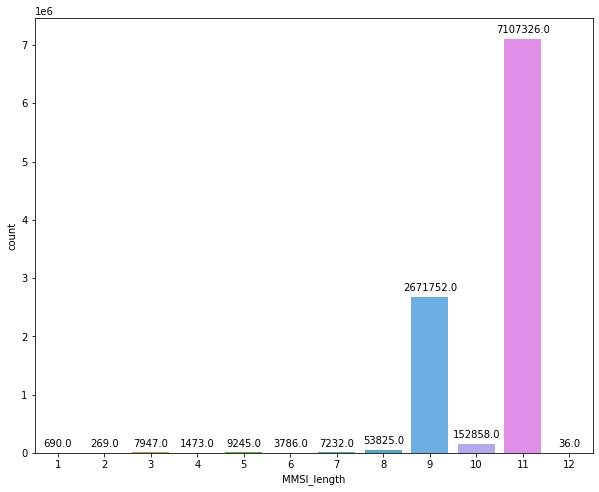

In [15]:
plt.figure(figsize=(10, 8))
ax= sns.countplot(x= 'MMSI_length', data= data)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

In [16]:
invalid_entries=[111111111,222222222,333333333,444444444,555555555,666666666,777777777,888888888,999999999, 123456789, 987654321]
invalid = data[data.mmsi_no.isin(invalid_entries)]

In [17]:
invalid

,uuid,mmsi_no,imo_no,speed,course,latitude,longitude,sensor_timestamp,track_type_code,country_name,...,draught,eta,in_track,length,source_sub_type_name,source_type_name,track_mil_civ_code,track_type_name,trackname,MMSI_length
1837,f8e41f39-2477-4a2c-a36e-15f4e320bf50,123456789,NaN,0.1,237.699997,24.8157,66.9736,1614352847,FISHING,UNKNOWN,...,NaN,1.609439e+09,False,NaN,NAIS,MSIS,CIV,FISHING,GLORY NO 1,9
8436,6740610a-7c5e-4dfb-929a-ab598c2b2bf0,999999999,NaN,0.1,215.800003,11.3336,102.4789,1614227427,FISHING,UNKNOWN,...,NaN,1.609439e+09,False,NaN,MSSIS,MSIS,CIV,FISHING,SPEE WAV,9
10117,2b8ac7f8-78a1-4e4f-83e5-15ed41e0030b,987654321,813897600.0,6.0,359.000000,10.3767,124.5650,1612204828,OTHER-TYPE-ALL,UNKNOWN,...,4.0,1.609439e+09,False,14.0,EXACTEARTH,MSIS,CIV,OTHER,CAT-VI,9
16200,2574f37d-3684-43c6-a843-cf9babbc045b,123456789,NaN,0.0,359.000000,26.0573,36.6168,1614277478,OTHER-TYPE-ALL,UNKNOWN,...,NaN,1.609439e+09,False,NaN,EXACTEARTH,MSIS,CIV,OTHER,ARA 4,9
16935,c9463685-3132-4eaa-9a84-3254f39bf57c,888888888,NaN,0.1,0.000000,11.6886,92.7220,1612237332,PASSENGER-ALL,UNKNOWN,...,NaN,1.609439e+09,False,NaN,NAIS,MSIS,CIV,PASSENGER,MV.MUS,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10007278,61f597cd-6ffd-41d3-b301-a390b043ef60,987654321.0,1234567.0,0.0,359.000000,28.6900,48.5550,1613615999,MILITARY-OPS,UNKNOWN,...,0.0,1.609443e+09,False,0.0,EXACTEARTH,MSIS,CIV,MILITARY-OPS,RAS AL QURAYN,11
10013797,baab4e43-6052-416b-923b-1cc2bbfdf76c,333333333.0,NaN,3.5,256.600006,12.6245,101.1126,1614068494,TANKER-ALL,UNKNOWN,...,NaN,1.612147e+09,False,NaN,MSSIS,MSIS,CIV,TANKER,J C MARINE 44,11
10013815,8927b49e-f884-4fea-ac40-8f3f7745e50b,123456789.0,NaN,1.0,223.000000,24.8432,66.9864,1614079536,FISHING,UNKNOWN,...,NaN,1.609439e+09,False,NaN,NAIS,MSIS,CIV,FISHING,None,11
10014209,9fc28270-1e4e-41f5-8515-40f3f97557b4,987654321.0,1234567.0,0.0,0.000000,28.6914,48.5560,1613953758,MILITARY-OPS,UNKNOWN,...,0.0,1.609443e+09,False,0.0,EXACTEARTH,MSIS,CIV,MILITARY-OPS,RAS AL QURAYN,11


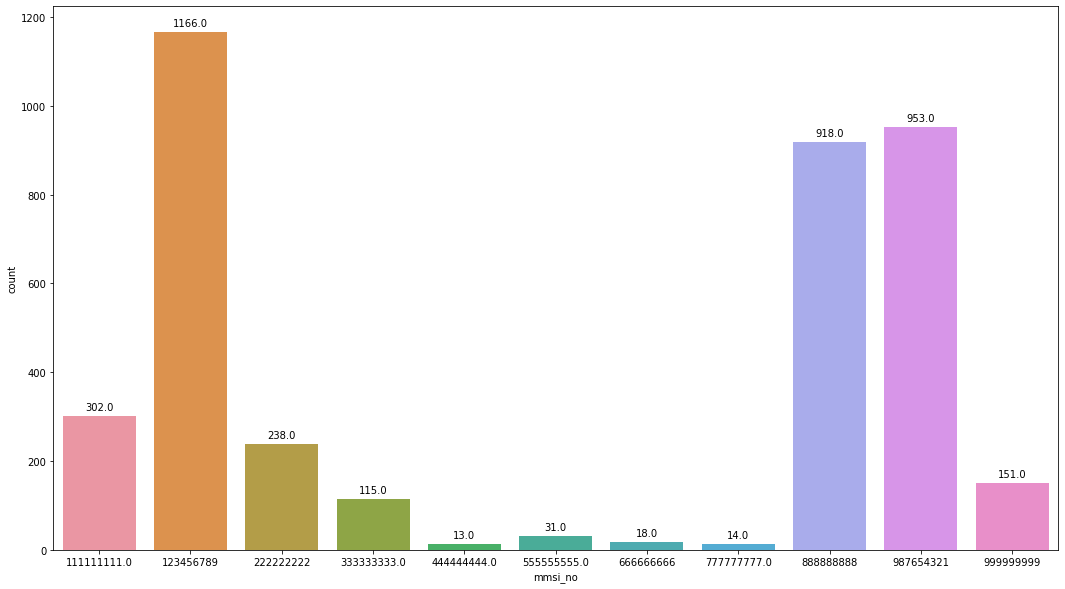

In [18]:
plt.figure(figsize=(18, 10))
ax= sns.countplot(x='mmsi_no', data=invalid)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

In [19]:
data.track_type_name.value_counts()

CARGO                3577872
TANKER               1976887
UNKNOWN              1105366
FISHING              1042114
OTHER                 703544
TUG                   681644
PASSENGER             266880
PLEASURE-CRAFT        133773
SAILING                88228
DREDGING               77023
TOWING                 61459
HSC                    60755
PILOT-VESSEL           45047
MERCHANT               41039
RESERVED               25946
MILITARY-OPS           25561
SAR                    24612
WIG                    17677
SPARE-LOCALVESSEL      14572
LAW-ENFORCEMENT        12787
DIVING-OPS             12313
PORT-TENDER            10308
ANTI-POLLUTION          4446
NONCOMBATANT-SHIP       2558
NAVAL-SHIP              1295
NAVAL TANKER              77
AIR                       15
SURFACE                   14
TRAWLER                    9
ARMY                       8
MISSILE                    7
AIRCRAFT-CARRIER           7
UAV                        6
CIVILIAN-AIRCRAFT          6
NAVAL-AIR     

In [20]:
correlation_mat = data.corr()

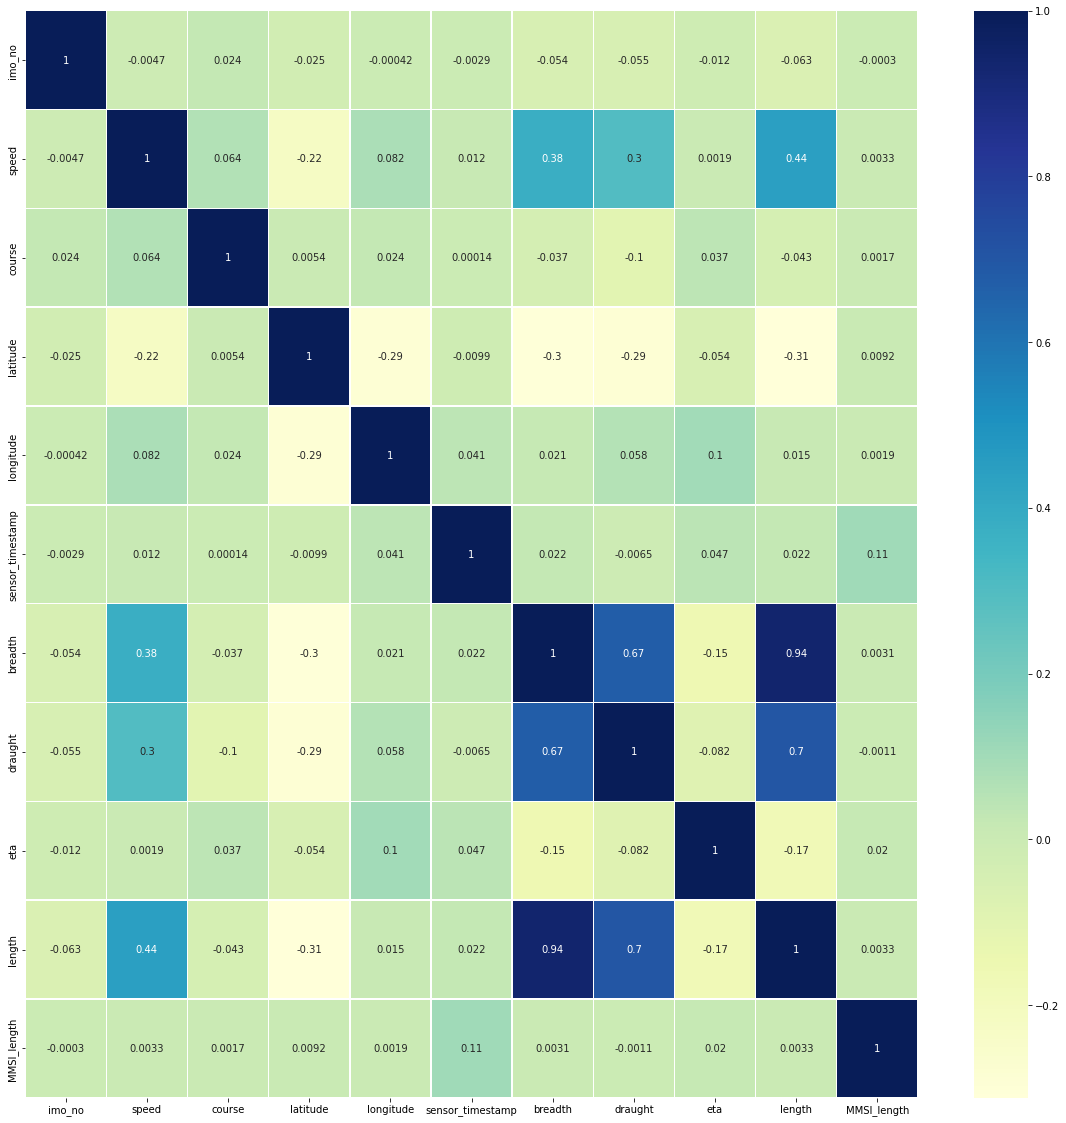

In [21]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(correlation_mat,annot=True,linewidths=.5,cmap="YlGnBu")

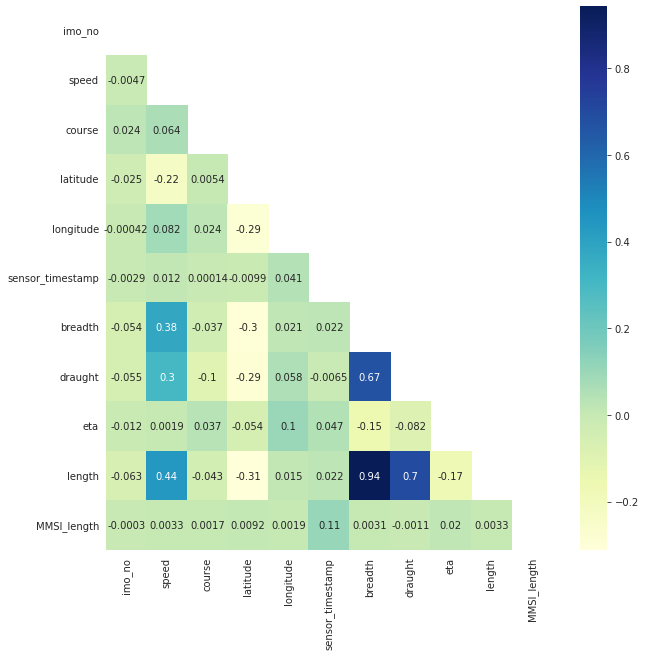

In [22]:

mask = np.zeros_like(correlation_mat)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10,10))
    ax = sns.heatmap(correlation_mat,
mask=mask,annot=True,cmap="YlGnBu")

In [23]:
data.dropna()

,uuid,mmsi_no,imo_no,speed,course,latitude,longitude,sensor_timestamp,track_type_code,country_name,...,draught,eta,in_track,length,source_sub_type_name,source_type_name,track_mil_civ_code,track_type_name,trackname,MMSI_length
2,a354b2cc-a05a-42f4-9c76-f3c99ef8ae2c,345080003,9338163.0,0.0,359.000000,27.9167,-110.8733,1612115245,TOWING,Mexico,...,0.0,1.609439e+09,False,80.0,EXACTEARTH,MSIS,CIV,TOWING,VB GLORIOSO,9
5,e01bd80c-02e7-434d-8e26-a3cc2b03f47b,219432000,9403891.0,0.3,254.699997,30.1698,-88.4958,1612071044,TANKER-ALL,Denmark,...,6.5,1.612001e+09,False,130.0,EXACTEARTH,MSIS,CIV,TANKER,TASING SWAN,9
9,7c1f0e55-1a13-4bb9-ab6b-19fc5bf6307c,232005533,9404235.0,9.5,111.400002,52.7209,2.0396,1612117408,OTHER-TYPE-ALL,United Kingdom,...,4.9,1.612121e+09,False,90.0,MSSIS,MSIS,CIV,OTHER,SCOT LEADER,9
12,5cf14025-fa33-4d0b-94e4-f3469602ef04,477468800,9640059.0,0.0,320.700012,54.3279,-130.3190,1612098796,CARGO-ALL,Hong Kong,...,8.1,1.611965e+09,False,199.0,EXACTEARTH,MSIS,CIV,CARGO,TEXEL ISLAND,9
27,ef3711d0-c3a7-49c0-bc06-867a3e6d8e39,563029900,9737498.0,17.5,106.500000,32.9521,28.1927,1612151943,OTHER-TYPE-ALL,Singapore,...,13.3,1.612190e+09,False,365.0,MSSIS,MSIS,CIV,OTHER,TAIPEI TRIUMPH,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10016424,c47cc124-4ac4-4102-aa78-04ab06ffc637,232019731.0,8740802.0,7.6,259.200012,50.4380,0.2119,1612918952,FISHING,United Kingdom,...,0.0,1.609439e+09,False,38.0,FRANCE_SPATIONAV,MSIS,CIV,FISHING,FLOWING STREAM SM462,11
10016427,35d5a3fd-0fb4-4300-94b1-bebc5477a0ae,225986261.0,9142760.0,0.0,0.000000,39.9734,0.0188,1613981924,TUG,Spain,...,4.5,1.640828e+09,False,33.0,MSSIS,MSIS,CIV,TUG,VB Matador,11
10016430,aab0a478-1120-420f-8e3c-06f47e08b231,419000622.0,9459046.0,11.1,50.000000,26.0341,54.0192,1614016822,TANKER-ALL,India,...,0.0,1.614037e+09,False,274.0,UK_TELESTO,MSIS,CIV,TANKER,DESH SHOBHA,11
10016431,042d4467-9406-4049-a5c2-2f21155fcd7c,461000151.0,9391218.0,30.6,12.000000,24.9081,56.5240,1613971829,HSC-ALL,Oman,...,2.6,1.613983e+09,False,52.0,UK_TELESTO,MSIS,CIV,HSC,MASIRAH 4,11


In [24]:
data_sample= data.sample(n=100000)

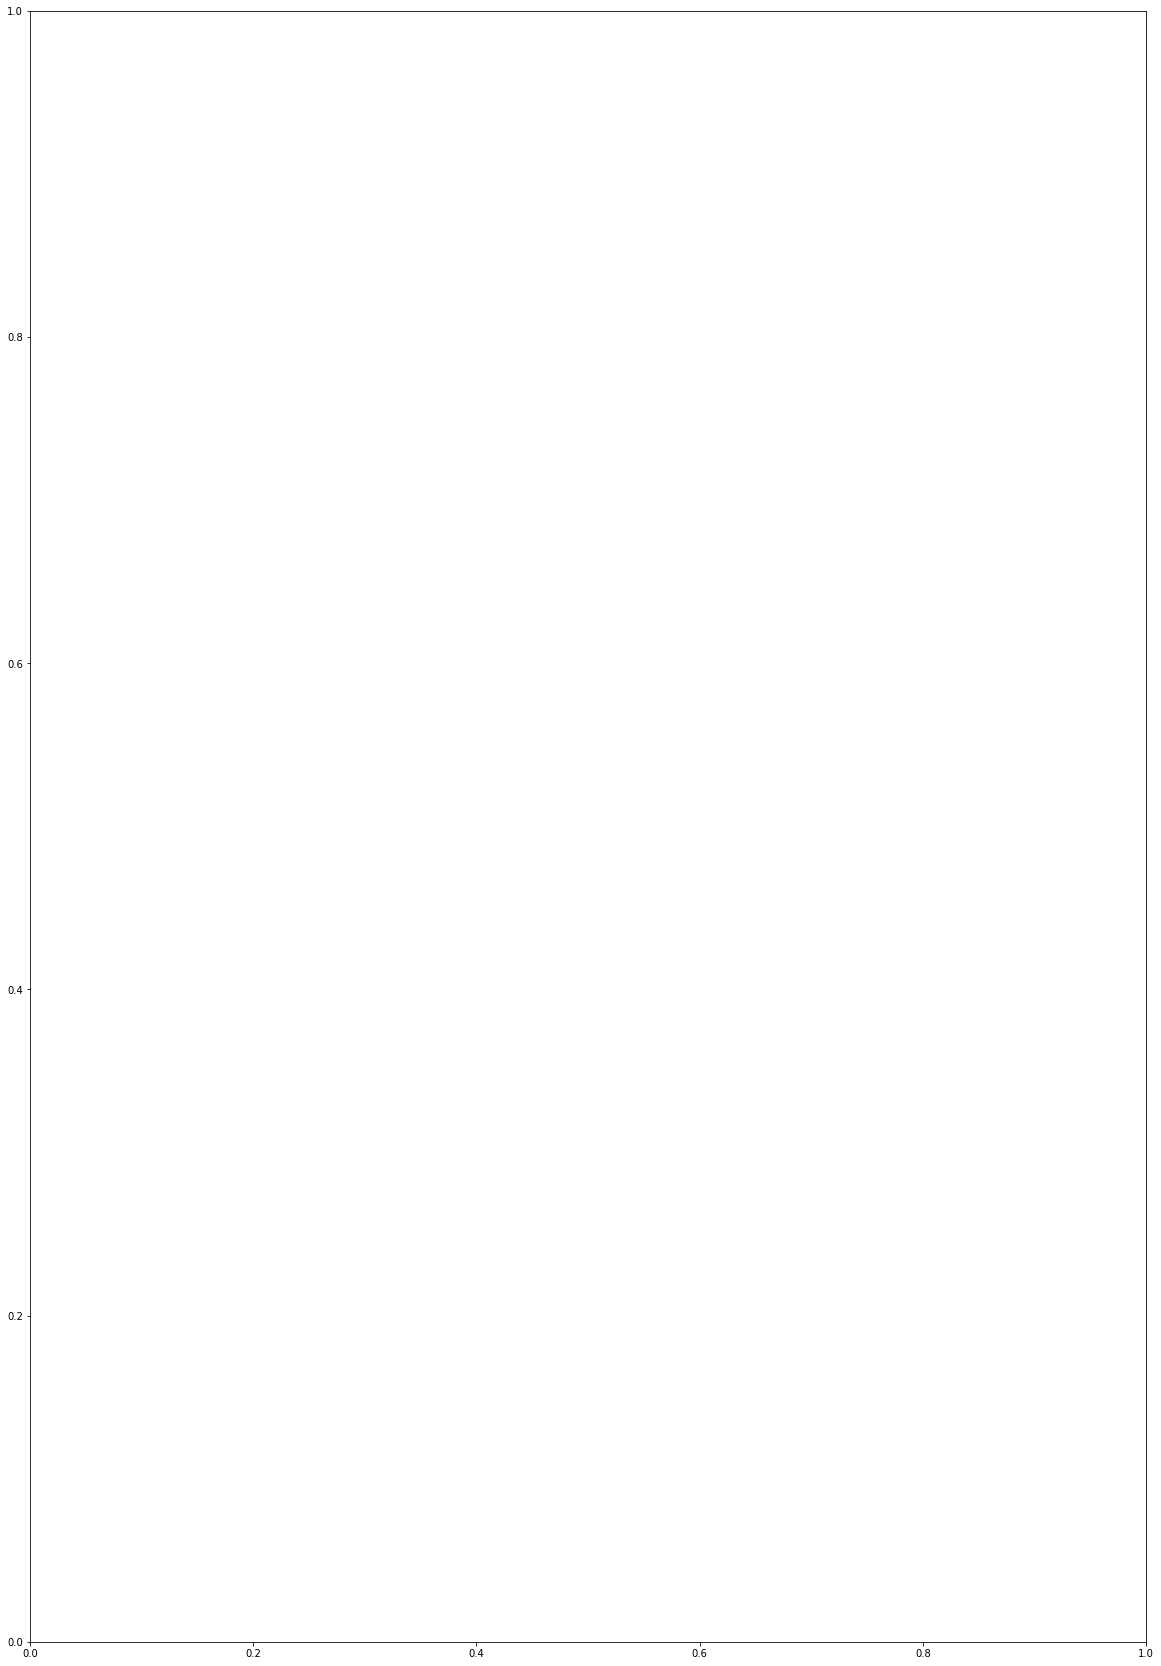

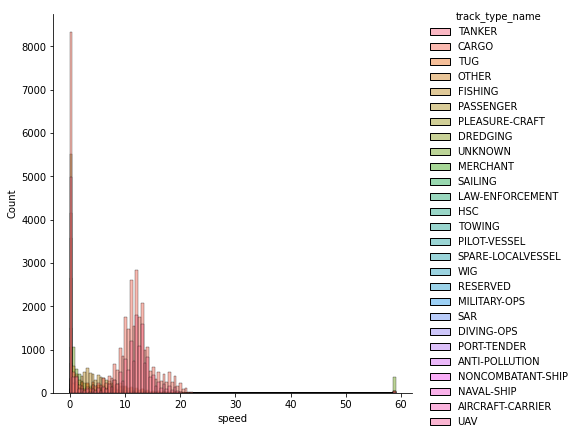

In [25]:
fig, ax = plt.subplots(figsize=(20, 30))
ax=sns.displot(data=data_sample,x="speed",hue="track_type_name",kind="hist",height=6)


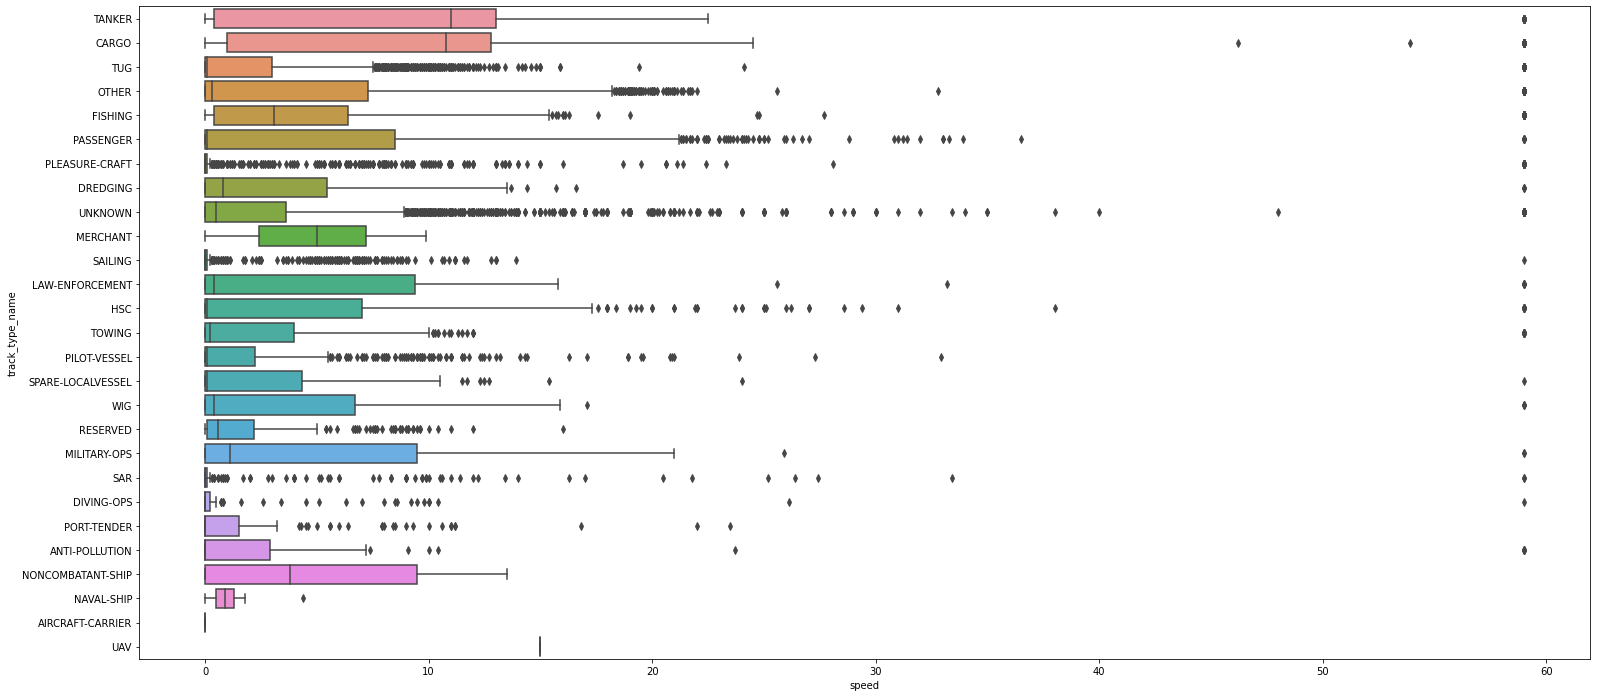

In [34]:
fig, ax = plt.subplots(figsize=(26,12))
sns.boxplot(x = 'speed', y = "track_type_name", data = data_sample, orient='h')

In [35]:
def box_outliers(series):
  Q1 =series.quantile(0.25)
  Q3 = series.quantile(0.75)
  IQR = Q3-Q1
  mask = (series < Q1 - 1.5*IQR) | (series > Q3 + 1.5*IQR)
  series = series[mask]
  return series

In [36]:
data_outliers = pd.DataFrame([])

In [37]:
for i in data_sample.copy().track_type_name.unique():
  df_outlier = data_sample.copy().sort_values(['track_type_name'])
  df_outlier = df_outlier.loc[df_outlier['track_type_name']==i, :].reset_index(drop=True)
  df_outlier = df_outlier[['track_type_name', 'speed']].set_index('track_type_name').apply(box_outliers)
  df_outlier = df_outlier.reset_index()
  data_outliers = data_outliers.append(df_outlier)

In [38]:
data_outliers.reset_index(drop=True)

,track_type_name,speed
0,TANKER,59.0
1,TANKER,59.0
2,TANKER,59.0
3,TANKER,59.0
4,TANKER,59.0
...,...,...
2649,ANTI-POLLUTION,7.4
2650,ANTI-POLLUTION,59.0
2651,ANTI-POLLUTION,10.4
2652,ANTI-POLLUTION,10.0


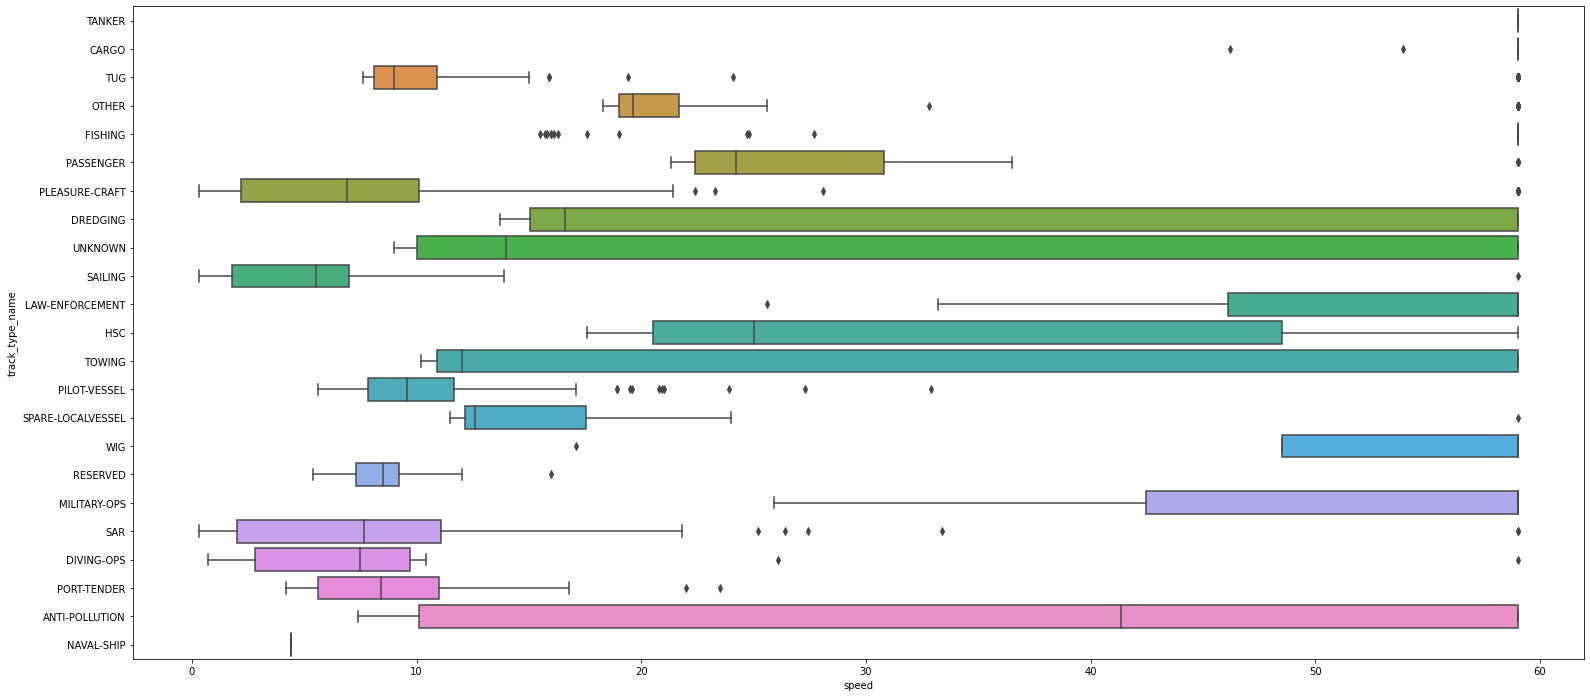

In [39]:
fig, ax = plt.subplots(figsize=(26,12))
sns.boxplot(x = 'speed', y = "track_type_name", data = data_outliers, orient='h')